In this assignment we implement a Deep Neural Network
Implement from scratch (hence not using NN libraries such as tensorflow,
keras, pytorch) a Neural Network that is able to approximate a function of
two variables f(x, y).\
The network will have at least two hidden layers and it
is trained using the backpropagation algorithm.\
The test case we consider is f(x, y) = x · y (we can say that we teach the network to multiply two numbers).\
As training data for the algorithm construct a matrix of input output triplets
of the function f(x, y) = x · y.\
When x, y ∈ [0, 1] the matrix would contain training triplets of the form [xi
, yj , xi· yj ], where xi and yj are random values in [0, 1].\
Try different activation functions and find out which one performs best with your network.\
For validation accuracy calculate the root mean square error.\
Add visualization of the RMSE over training epochs, and perform simple
tests to check accuracy.

\begin{equation}
\text{standard form}\\
o_h=\sum_{l=1}^{10}w_l^4\phi\left(\sum_{k-1}^{10}w_{lk}^3\phi\left(\sum_{j=1}^{10}w_{jk}^2\phi\left(\sum_{i=1}^2w_{ji}^1x_{hi}+b_j^1\right)+b_k^2\right)b_l^3\right)+c\\
=======================================\\
\text{vector form}\\
o_h=W^4\phi\left(W^3\phi\left(W^2\phi\left(W^1x_h+B^1\right)+B^2\right)+B^3\right)+c\\
=======================================\\
W^1\rightarrow 10\times2\\
W^2\rightarrow 10\times10\\
W^3\rightarrow 10\times10\\
W^4\rightarrow 1\times10\\
x_h\rightarrow 2\times1\\
B^1\rightarrow 10\times1\\
B^2\rightarrow 10\times1\\
B^3\rightarrow 10\times1\\
c\rightarrow \text{scalar}\\
o_h\rightarrow \text{scalar}\\
=======================================\\
o_h=W^4\phi\left(W^3\phi\left(W^2\phi\left((10\times2)(2\times1)+(10\times1)\right)+B^2\right)+B^3\right)+c\\
o_h=W^4\phi\left(W^3\phi\left(W^2\phi\left(10\times1\right)+B^2\right)+B^3\right)+c\\
o_h=W^4\phi\left(W^3\phi\left((10\times10)\left(10\times1\right)+(10\times1)\right)+B^3\right)+c\\
o_h=W^4\phi\left((10\times10)\left(10\times1\right)+(10\times1)\right)+c\\
o_h=(1\times10)\left(10\times1\right)+c\\
o_h=\text{scalar}+\text{scalar}\\
\end{equation}

In [218]:
# initialize the weights
import numpy as np
# decent values: 4, 6..
np.random.seed(6)
W1 = np.random.randn(10,2) * np.sqrt(1/2) # 10x2
W2 = np.random.randn(10,10) * np.sqrt(1/10) # 10x10
W3 = np.random.randn(10,10) * np.sqrt(1/10) # 10x10
W4 = np.random.randn(1,10) * np.sqrt(1/10) # 1x10

In [219]:
#initialize the biases
import numpy as np
b1 = np.random.randn(10,1) * np.sqrt(1/2) # 10x1
b2 = np.random.randn(10,1) * np.sqrt(1/10) # 10x1
b3 = np.random.randn(10,1) * np.sqrt(1/10) # 10x1
c = np.random.randn() * np.sqrt(1/10) # scalar

In [220]:
# hyperbolic tangent
import numpy as np
def htan(x):
  return np.tanh(x)

# predictions and recordings
def predict_and_record(x):
  preA1 = (W1@x) # calculate pre-activations for layer 1
  A1 = htan(preA1 + b1) # calculate activations for layer 1
  preA2 = (W2@A1) # calculate pre-activations for layer 2
  A2 = htan(preA2 + b2) # calculate activations for layer 2
  preA3 = (W3@A2) # calculate pre-activations for layer 3
  A3 = htan(preA3 + b3) # calculate activations for layer 3

  # pre-activation values for the output layer will also be the activation values
  # because we are using a linear activation function for the output layer
  O = (W4@A3) + c # scalar

  #return W4@htan( W3@htan( W2@htan( W1@x +b1 ) +b2 ) +b3 ) +c
  return preA1, A1, preA2, A2, preA3, A3, O

In [221]:
# data creation function
import numpy as np
def create_data(n_observations):
    train_data = np.random.rand(2*n_observations).reshape((n_observations, 2))
    label_data = train_data[:,0] * train_data[:,1]
    return train_data, label_data


In [222]:
# visualize the training data
training_size = 10000
X, y = create_data(training_size)

print(X)
print(y)

[[0.99821206 0.94038221]
 [0.14123706 0.93816832]
 [0.03865758 0.02518467]
 ...
 [0.00837526 0.76973928]
 [0.30446397 0.52157319]
 [0.3330448  0.21964554]]
[0.93870087 0.13250414 0.00097358 ... 0.00644676 0.15880024 0.0731518 ]


In [223]:
# derivative of hyperbolic tangent
import numpy as np
def htan_prime(x):
  return 1 - np.tanh(x)**2

# a single pass of back propagation
mu = 0.01
def single_backPropagation(x, W1, W2, W3, W4, b1, b2, b3, c, z1, a1, z2, a2, z3, a3, o, y):
  # calculate the gradient of the loss with respect to the pre-activations of each layer
  output_gradient = o-y # scalar
  layer3_gradient = (W4.T * output_gradient) * htan_prime(o) # 10x1
  layer2_gradient = (W3.T @ layer3_gradient) * htan_prime(z3) # 10x1
  layer1_gradient = (W2.T @ layer2_gradient) * htan_prime(z2) # 10x1

  # gradient of right layer, pre-activations of right layer, activations of previous layer
  loss_W4 = output_gradient * htan_prime(o) * a3 # 10x1
  loss_c = output_gradient * htan_prime(o) # 10x1
  W4 -= (mu * loss_W4).T
  c -= (mu * loss_c)
  # update (W3) with EW3 and (B3) with Eb3
  loss_W3 = layer3_gradient * htan_prime(z3) @ a2.T # 10x10
  loss_b3 = layer3_gradient * htan_prime(z3) # 10x1
  W3 -= (mu * loss_W3)
  b3 -= (mu * loss_b3)
  # update (W2) with EW2 and (B2) with Eb2
  loss_W2 = layer2_gradient * htan_prime(z2) @ a1.T # 10x10
  loss_b2 = layer2_gradient * htan_prime(z2) # 10x1
  W2 -= (mu * loss_W2)
  b2 -= (mu * loss_b2)
  # update (W1) with EW1 and (B1) with Eb1
  loss_W1 = layer1_gradient * htan_prime(z1) @ x.T # 10x2
  loss_b1 = layer1_gradient * htan_prime(z1) # 10x1
  W1 -= (mu * loss_W1)
  b1 -= (mu * loss_b1)

# function to train the network on all training data
def train():
  for i in range(training_size):
    # forward pass
    z1, a1, z2, a2, z3, a3, o = predict_and_record(X[i,:].reshape(-1,1))
    # back propagation
    single_backPropagation(X[i,:].reshape(-1,1), W1, W2, W3, W4, b1, b2, b3, c, z1, a1, z2, a2, z3, a3, o, y[i])

In [224]:
# print the weights and biases to see change
print("W1: ", W1)
print("b1: ", b1)
print("W2: ", W2)
print("b2: ", b2)
print("W3: ", W3)
print("b3: ", b3)
print("W4: ", W4)
print("c: ", c)

W1:  [[-0.22046435  0.51548362]
 [ 0.15402256 -0.63575391]
 [-1.75841946  0.64576634]
 [ 0.7969544  -1.07062559]
 [ 1.15915384 -0.30398068]
 [ 1.86059633  0.42555259]
 [-0.23750417  0.87521282]
 [ 0.07857948  0.09132372]
 [ 0.05383035 -0.10969217]
 [ 0.44846504  0.57321965]]
b1:  [[ 0.68357133]
 [-0.66133866]
 [-0.62098702]
 [-0.32224854]
 [ 0.52543401]
 [ 0.13668221]
 [-0.68682932]
 [ 1.34129118]
 [-0.38417391]
 [-0.08753606]]
W2:  [[ 0.11220033  0.57319139 -0.42895531 -0.1466133   0.26077844 -0.3720203
   0.49473507  0.22537714 -0.05723931  0.16892872]
 [-0.18550331 -0.46860315  0.2710855   0.29823409  0.03618956 -0.00694331
  -0.67266217 -0.26386281 -0.14720665  0.07390578]
 [ 0.4379866  -0.16432051 -0.24670577  0.30219029 -0.04007756 -0.43279338
   0.38531741 -0.27116576 -0.17755268 -0.32682769]
 [ 0.11345334  0.33952785 -0.11874502  0.12534243 -0.1490844   0.73890027
   0.47522251 -0.1883009   0.16707611  0.2971987 ]
 [ 0.13480328 -0.2397503  -0.05134495  0.22983749  0.14043137 -0

In [225]:
# test the network
import numpy as np

# build testing data
test_size = 100
test_data, test_results = create_data(test_size)

# train the network, test it, and record RMSE 20 times
RMSE = np.zeros((15,2))
for i in range(15):
  # train the network over all inputs with SGD
  train()

  # print out RMSE
  summed_error = 0.0
  for j in range(test_size):
    z1, a1, z2, a2, z3, a3, o = predict_and_record(test_data[j,:])
    summed_error += (o[0][0] - test_results[j])**2
  RMSE[i][1] = i
  RMSE[i][0] = np.sqrt(summed_error/test_size)
  print("RMSE[", i, "]: ", RMSE[i][0])

RMSE[ 0 ]:  0.36775841625594086
RMSE[ 1 ]:  0.30642076473589136
RMSE[ 2 ]:  0.2760002258240394
RMSE[ 3 ]:  0.2643249554597763
RMSE[ 4 ]:  0.26011988242132533
RMSE[ 5 ]:  0.25862920595335365
RMSE[ 6 ]:  0.25815610532834915
RMSE[ 7 ]:  0.2580851271778481
RMSE[ 8 ]:  0.2581758115068417
RMSE[ 9 ]:  0.2583274568349359
RMSE[ 10 ]:  0.2584962830028199
RMSE[ 11 ]:  0.25866349152930523
RMSE[ 12 ]:  0.25882185135033
RMSE[ 13 ]:  0.2589696735467297
RMSE[ 14 ]:  0.2591079706643404


In [226]:
# test = np.array([[0.0322],[0.19]])                            # (0.5 * 0.5) = 0.25
# z1, a1, z2, a2, z3, a3, o = predict_and_record(test)
# print(o)

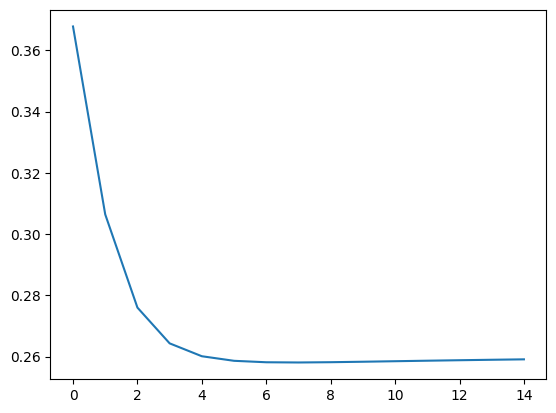

In [227]:
# visualize the test results
import matplotlib.pyplot as plt
plt.plot(RMSE[:,1],RMSE[:,0])
plt.show()